### What is Classification ?
> ML Algo try to classify rows of data into categories(classes)

In [1]:
# import lib
import pandas as pd 


In [2]:
#read dataset
data = pd.read_csv('iris.csv',index_col=0)

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
#Import Ml Algos 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Split into test train
X = data.drop('Species',axis=1)
y = data['Species']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) 

In [8]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
59,6.6,2.9,4.6,1.3
108,7.3,2.9,6.3,1.8
113,6.8,3.0,5.5,2.1
146,6.7,3.0,5.2,2.3
30,4.7,3.2,1.6,0.2
63,6.0,2.2,4.0,1.0
126,7.2,3.2,6.0,1.8
112,6.4,2.7,5.3,1.9
56,5.7,2.8,4.5,1.3


In [9]:
svc = SVC()
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)

In [10]:
ypred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [11]:
accuracy_score(ypred,y_test)

1.0

In [12]:
p = svc.predict([[2,3,1,0]])

In [13]:
p

array(['Iris-setosa'], dtype=object)

In [14]:
# Findinf most important feature 
# Permutation_importance is used 
# Import 
from sklearn.inspection import permutation_importance

In [15]:
perm = permutation_importance(svc,X_test,y_test)

In [16]:
perm.importances_mean

array([0.02666667, 0.02      , 0.61333333, 0.13333333])

In [17]:
# Visualize the impotant features
sortindx = perm.importances_mean.argsort()
df=pd.DataFrame(perm.importances_mean[sortindx],X_test.columns[sortindx],columns=['Value'])

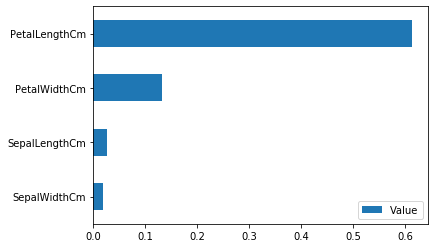

In [18]:
df.plot.barh()

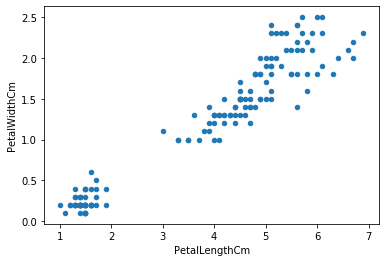

In [19]:
data.plot.scatter(x='PetalLengthCm',y='PetalWidthCm')

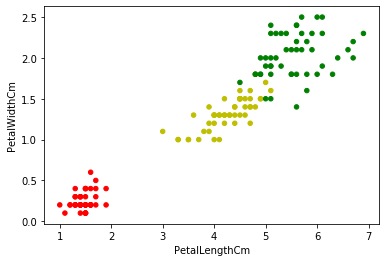

In [20]:
color_map = {'Iris-setosa': 'r','Iris-versicolor':'y','Iris-virginica':'g'}
colors = data['Species'].apply(lambda x: color_map[x])
data.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',c=colors)

In [21]:
# Apply KNN 
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
ypr = knc.predict(X_test)
accuracy_score(y_test,ypr)

0.9666666666666667

In [23]:
pre = permutation_importance(knc,X_test,y_test)
pre.importances_mean

array([-0.01333333, -0.00666667,  0.62666667,  0.10666667])

In [24]:
si = pre.importances_mean.argsort()

In [25]:
da = pd.DataFrame(pre.importances_mean[si],X_test.columns[si],columns=['Value'])

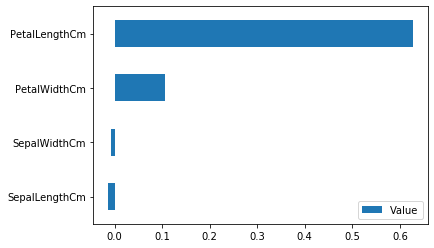

In [26]:
da.plot.barh()

## Project Classification with Hidden Features

In [31]:
# All the libraries are already imported above so we just need to load the data 
data = pd.read_csv('classified_data.csv',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [32]:
len(data)

1000

In [33]:
data['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [34]:
data.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [35]:
# Split into test train 
X = data.drop('TARGET CLASS',axis=1)
y=data['TARGET CLASS']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [51]:
# Applying SVC model 
svc =SVC()
svc.fit(X_train,y_train)
ypre = svc.predict(X_test)
accuracy_score(y_test,ypre)

0.925

In [52]:
# Apply KNN 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
yp = knn.predict(X_test)
accuracy_score(y_test,yp)

0.93

In [53]:
pre = permutation_importance(svc,X_test,y_test)
pre.importances_mean

array([ 0.03 ,  0.008,  0.062, -0.004,  0.005,  0.002, -0.003,  0.022,
        0.062,  0.003])

In [55]:
sor = pre.importances_mean.argsort()
df = pd.DataFrame(pre.importances_mean[sor],X_test.columns[sor],columns=['Value'])

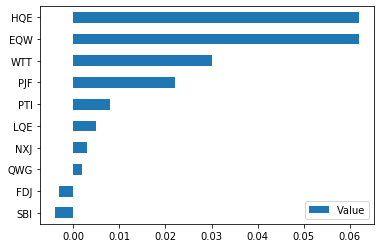

In [56]:
df.plot.barh()

In [57]:
pk = permutation_importance(knn,X_test,y_test)
pk.importances_mean

array([0.026, 0.033, 0.055, 0.006, 0.019, 0.014, 0.012, 0.042, 0.08 ,
       0.007])

In [58]:
so = pk.importances_mean.argsort()
d = pd.DataFrame(pk.importances_mean[so],X_test.columns[so],columns=['Value'])

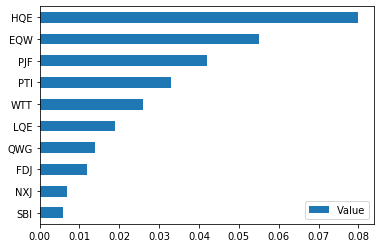

In [59]:
d.plot.barh()

In [65]:
X = X.drop('FDJ',axis=1)


KeyError: "['FDJ'] not found in axis"

In [66]:
X = X.drop('SBI',axis=1)

In [67]:
y=data['TARGET CLASS']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [69]:

# Applying SVC model 
svc =SVC()
svc.fit(X_train,y_train)
ypre = svc.predict(X_test)
accuracy_score(y_test,ypre)

0.935

In [70]:
# Apply KNN 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
yp = knn.predict(X_test)
accuracy_score(y_test,yp)

0.925